### Deeplearning using the Artificial Nueral Networks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings("ignore")


In [2]:
df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [3]:
df.drop('customerID', axis='columns', inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
# connvert the total charges column from containing strings to numbers
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [6]:
#looking for the blank pages
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
df.iloc[488]['TotalCharges']

' '

In [8]:
#Drop the blank rows
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [9]:
#converting the totalcharge  column to a numeric one
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [10]:
df1.TotalCharges.dtypes

dtype('float64')

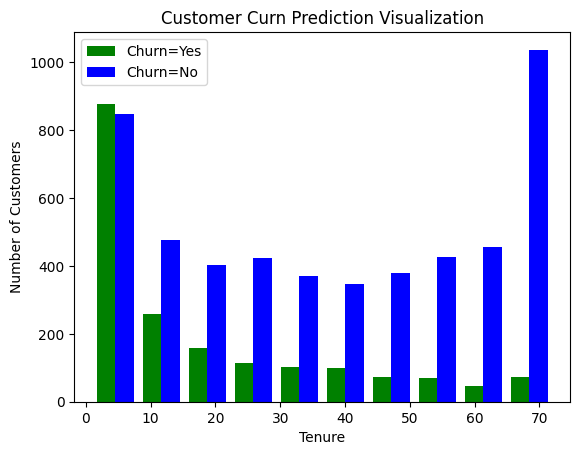

In [11]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title('Customer Curn Prediction Visualization')

plt.hist([tenure_churn_yes, tenure_churn_no],color=['green','blue'],label=['Churn=Yes','Churn=No'])
plt.legend()


Observed above that the majority of people who are with the company for a long time are not living.

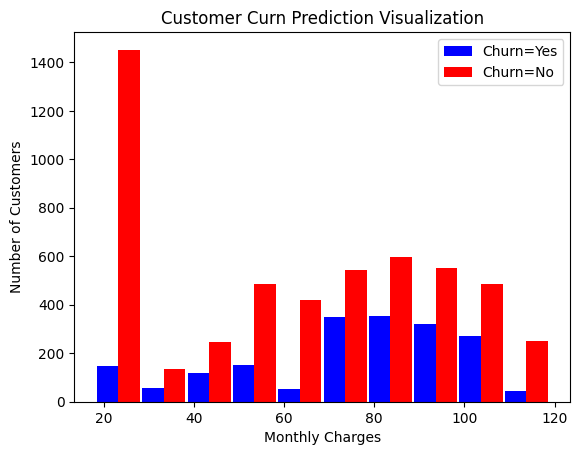

In [12]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.title('Customer Curn Prediction Visualization')

blood_sugar_men = [113,85,90,150,149,88,93,115,135,80,77,82,129]
blood_sugar_women = [67,98,89,120,133,150,84,69,89,79,120,112,100]

plt.hist([mc_churn_yes, mc_churn_no],rwidth=0.95, color=['blue','red'],label=['Churn=Yes','Churn=No'])
plt.legend()


customer who have very high charges are living more 

In [13]:
# knowing the object type of a column
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')
            
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [14]:
#replace the multiplelines column the 'No phone service' entry with 'No'
df1.replace('No phone service', 'No', inplace=True)
#replace the OnlineSecurity,StreamingMovies,StreamingTV,TechSupport,DeviceProtection,OnlineBackup columns the 'No internet service' entry with 'No'
df1.replace('No internet service', 'No', inplace=True)

#view the non_numeric columns now
print_unique_col_values(df1)


gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [15]:
#replace yes and no entrys in the columns to numeric data i.e 1 and 0
yes_no_columns = ['PaperlessBilling','OnlineSecurity','OnlineBackup','DeviceProtection', 'TechSupport','DeviceProtection',
                  'MultipleLines','StreamingTV','StreamingMovies', 'Partner', 'Dependents', 'PhoneService' ,'Churn','MultipleLines' ]

for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No':0},inplace=True)

#viewing all the cuniques columns 
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [16]:
# replace the gender columnb male or female entries with 1 and 0
df1['gender'].replace({'Female': 1,'Male':0},inplace=True)

##### One Hot Encoding

In [33]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [18]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5697,1,0,1,0,70,1,1,0,1,1,...,False,True,False,False,True,False,False,False,True,False
362,0,0,1,0,58,1,0,0,0,1,...,True,False,False,False,True,False,False,True,False,False
4537,0,0,1,0,17,0,0,0,1,0,...,True,False,False,True,False,False,False,False,False,True
1402,1,0,0,1,18,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False


In [34]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [36]:
#Converting the bool columns to numeric onces

bool_columns = [

    'InternetService_DSL',
    'InternetService_Fiber optic',
    'InternetService_No',
    'Contract_Month-to-month',
    'Contract_One year',
    'Contract_Two year',
    'PaymentMethod_Bank transfer (automatic)',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check',
]

# Convert bool columns to numeric (int)
df2[bool_columns] = df2[bool_columns].astype(int)

# Verify the conversion
print(df2.dtypes)


gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

##### Scaling

Scaling the numerical clumns that are no in the 0 and 1 range


In [37]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']


scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])



In [38]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6969,0,0,0,0,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
2869,1,0,0,0,0.070423,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
6605,0,1,0,0,0.915493,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0


#### Train, Test, Split

In [39]:
# defining X and Y
X=df2.drop('Churn', axis='columns')
y=df2['Churn']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [41]:
X_train.shape

(5625, 26)

In [42]:
X_test.shape

(1407, 26)

#### Deep  Learning

In [43]:
import tensorflow as tf
from tensorflow import keras

In [47]:
#creating a nueral network

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
    
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs= 100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5660 - accuracy: 0.6892
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.7906
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4229 - accuracy: 0.8007
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.8014
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.8043
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8052
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8048
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8041
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4110 - accuracy: 0.8066
Epoch 10/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4116 - accura

In [48]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 3ms/step - loss: 0.4547 - accuracy: 0.7832


[0.45474743843078613, 0.783226728439331]

In [50]:
#predict
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.2279852 ],
       [0.47000116],
       [0.01197081],
       [0.8001568 ],
       [0.48495662]], dtype=float32)

In [51]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [52]:
y_pred = []

for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [55]:
y_pred[:5]

[0, 0, 0, 1, 0]

In [56]:
#Classification report

from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.66      0.53      0.59       408

    accuracy                           0.78      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.77      0.78      0.78      1407



tf.Tensor(
[[886 113]
 [192 216]], shape=(2, 2), dtype=int32)


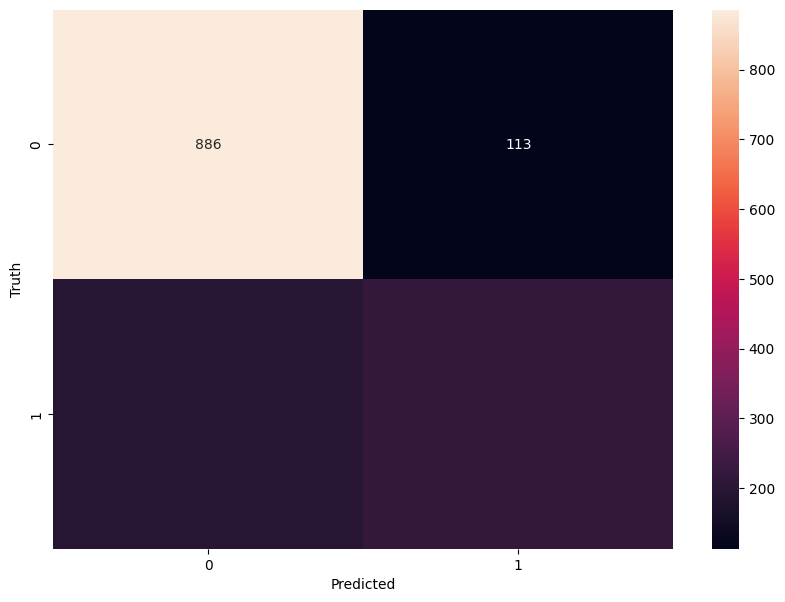

In [60]:
import seaborn as sn 
cm = tf.math.confusion_matrix(labels=y_test, predictions= y_pred)


plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

print(cm)


##### Accuracy

In [61]:
round((886+216)/(886+216+113+192),2)

0.78

##### Precision for the 0 class. i.e. Precision for customers who did not churn

In [62]:
round(886/(886+192),2)

0.82

##### Precision for 1 class. i.e. Precision for customers who did acctually did churn


In [64]:
round(216/(216+113),2)

0.66

##### Recall for 0 class

In [65]:
round(886/(886+113),2)

0.89

##### Recall for 1 class

In [66]:
round(216/(216+192),2)

0.53